# Warmin' up...

This notebook is corresponding to: https://course.fast.ai/videos/?lesson=1

In [4]:
a = 1
a

1

In [5]:
a = 1
b = 2
a,b

(1, 2)

# Heyho, let's go!

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

Above is only for Jupyter Notebook, not too sure if it's working in Google Colab

In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [8]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [9]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [10]:
path = untar_data(URLs.PETS); path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [11]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [12]:
path_anno = path/'annotations'
path_img = path/'images'
path_anno, path_img

(PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images'))

Above is some new stuffs in Python3, not too sure what

In [13]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_14.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/havanese_11.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/boxer_115.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/basset_hound_189.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_196.jpg')]

In [0]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$' # Just a regex

In [15]:
# Get a dataBunch? and transform the image to square
# The transforms probably will pad the size if it is too small
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224)
# Normalize the image, make it the same size
# normalize the pixel value too
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList
y: CategoryList (5912 items)
[Category havanese, Category havanese, Category boxer, Category Ragdoll, Category Ragdoll]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (5912 items)
[Image (3, 333, 500), Image (3, 500, 333), Image (3, 375, 500), Image (3, 375, 500), Image (3, 500, 375)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList
y: CategoryList (1478 items)
[Category english_setter, Category Persian, Category Russian_Blue, Category Russian_Blue, Category boxer]...
Path: /root/.fastai/data/oxford-iiit-pet/images
x: ImageItemList (1478 items)
[Image (3, 500, 375), Image (3, 380, 500), Image (3, 333, 500), Image (3, 500, 334), Image (3, 375, 500)]...
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

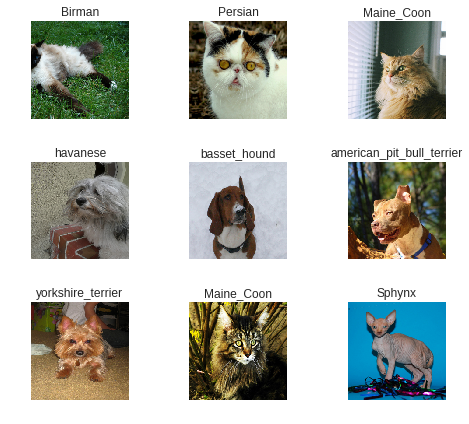

In [16]:
# show_batch is to display ImageDataBunch
data.show_batch(rows=3, figsize=(7,6))

In [17]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [18]:
len(data.classes),data.c
# data.c is number of classes

(37, 37)

# Time to do some training


In [19]:
# create_cnn is used to be known as ConvLearner in the vid
# https://forums.fast.ai/t/fixing-notebook-1-convlearner-not-found/28367
# cnn = convolutional neural network

# resnet34 is one of the model, need to read it up
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 88193069.11it/s]


In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
1,1.387981,0.355179,0.106225
2,0.546560,0.244901,0.079161
3,0.340464,0.220311,0.067659
4,0.266663,0.213383,0.067659


In [0]:
learn.save('stage-1')

# Getting the result

In [0]:
# Basically it will just get the interpretation from the training that has been done
interp = ClassificationInterpretation.from_learner(learn)

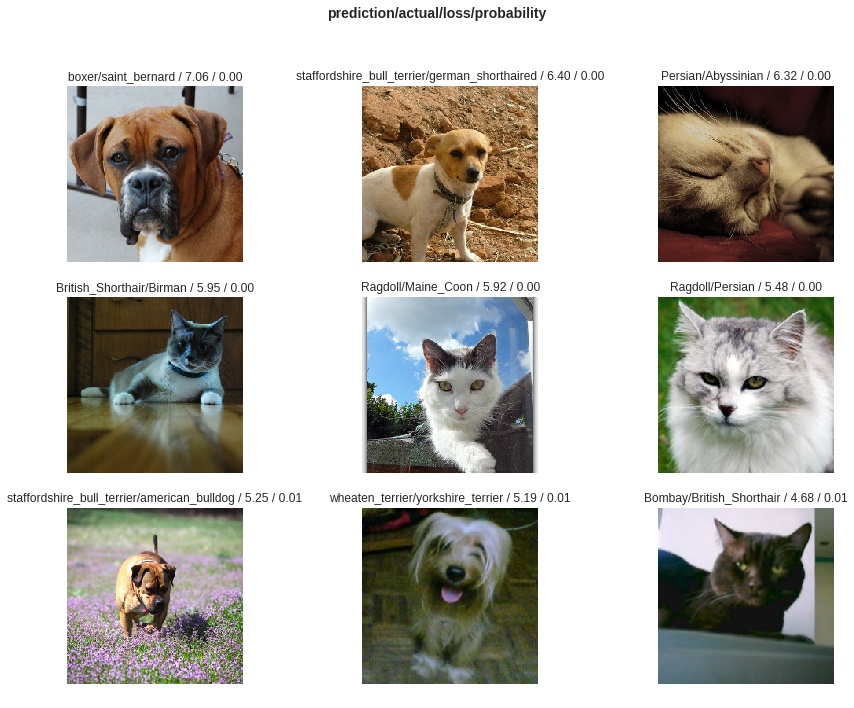

In [29]:
# Getting the top loses, to see how confident in getting the false positive (false prediction)
# label: prediction, actual, loss, probability of actual class
interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)
# Should jump straight to documentation, didn't work in Google Colab

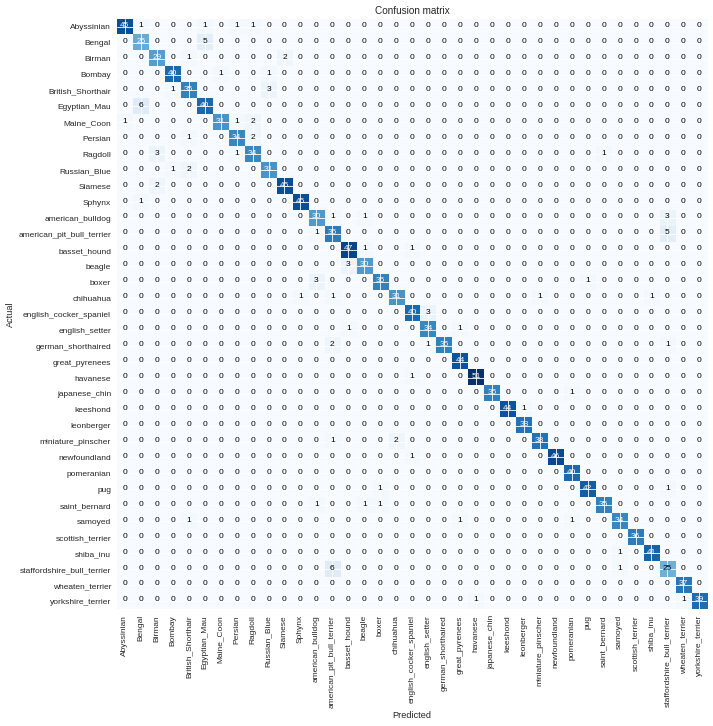

In [31]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [32]:
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3)]

# Epilogue

In [0]:
learn.unfreeze()
# Unfreezing the model, and try to train again

In [34]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate
1,0.556725,0.363528,0.108254


In [0]:
learn.load('stage-1')

In [38]:
learn.lr_find()
# Getting learning rate
# Got interrupted result from Google Colab, not too sure why

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


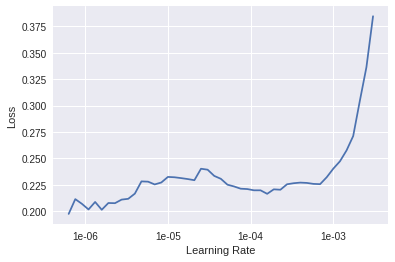

In [39]:
learn.recorder.plot()

In [49]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=1e-6)

epoch,train_loss,valid_loss,error_rate
1,0.237844,0.213650,0.066306
2,0.240663,0.210049,0.064953


In [0]:
learn.save('stage-1-ft-1')

In [51]:
learn.load('stage-1-ft-1')
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 8),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('Bengal', 'Egyptian_Mau', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Maine_Coon', 'Ragdoll', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3)]

In [48]:
learn.load('stage-1')
interp = ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=2)

[('Egyptian_Mau', 'Bengal', 6),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 6),
 ('Bengal', 'Egyptian_Mau', 5),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 5),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Ragdoll', 'Birman', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('english_cocker_spaniel', 'english_setter', 3)]